# Acknowledgment

This is my first official submission to a Kaggle competition. I want to express my gratitude to Murilo Gustineli for his detailed Titanic Classification Notebook on GitHub. You can view his notebook at this link: https://github.com/murilogustineli/Titanic-Classification.

# Import Libraries

In [1]:
# For data manipulation and analysis
import pandas as pd

# For numerical operations
import numpy as np

# For creating visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# For regular expressions
import re

# Suppress all warnings
import warnings
warnings.filterwarnings("ignore")

# Import NLTK and functions for tokenizations and n-grams
import nltk
nltk.download("punkt")
from nltk.util import ngrams
from nltk.corpus import names
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Import Data

In [2]:
# Import titanic train file
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")

# Import titanic test file
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")

# Import gender submission file
gender_submission = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

# Read Data
In this section, I reviewed data from three dataframes to confirm the columns, check for any missing values, and analyze their statistics.

The analysis revealed missing values in the "Age", "Cabin", "Fare", and "Embarked" columns across train and test dataframes.

Additionally, "test_df" and "gender_submission" were merged using the "PassengerId" column as a reference for testing purposes.

In [3]:
# Reading "train_df" dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Reading "test_df" dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
# Reading "gender_submission" dataset
gender_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [6]:
# Missing values in "train_df" dataset
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Missing values in "test_df" dataset
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
# Missing values in "gender_submission" dataset
gender_submission.isnull().sum()

PassengerId    0
Survived       0
dtype: int64

In [9]:
# Viewing statistical analysis of "train_df" dataset
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# Viewing statistical analysis of "test_df" dataset
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
train_df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
384,385,0,3,"Plotcharsky, Mr. Vasil",male,NaN,0,0,349227,7.8958,NaN,S


In [12]:
# Merge "test_df" with "gender_submission" based on column "PassengerId"
test_df = pd.merge(test_df,gender_submission,how = "inner",on = "PassengerId")

# Rearrange "Survived" column
col = test_df.pop("Survived")
test_df.insert(1, "Survived", col)

In [13]:
test_df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
164,1056,0,2,"Peruschitz, Rev. Joseph Maria",male,41.0,0,0,237393,13.0,NaN,S


# Visualize Data
**General Note:**
Throughout the rest of the section, please note that "0" indicates not-survived and "1" indicates survived.

**Overall Survival:**
The majority of people did not survive the Titanic crash.

**Gender:**
Among those who survived, the majority were females.

**Class:**
When examining survival rates by class, first-class ticket holders had a higher chance of survival compared to third-class ticket holders.

**Children Under 18:**
For children under the age of 18, the survival rates for both males and females were above 0.8 for first and second-class ticket holders.

<Axes: xlabel='Survived', ylabel='count'>

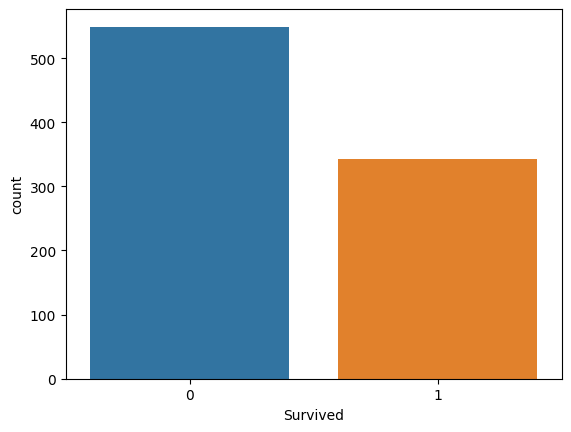

In [14]:
# Number of People Survived 
sns.countplot(data = train_df, x = "Survived")

<Axes: xlabel='Survived', ylabel='count'>

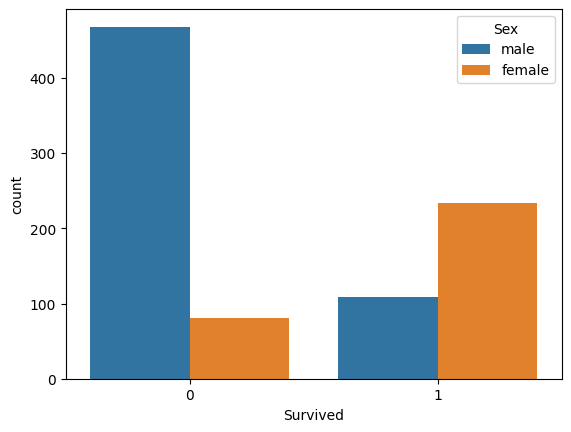

In [15]:
# Number of People Survived by Sex
sns.countplot(data = train_df, x = "Survived", hue = "Sex")

<Axes: xlabel='Survived', ylabel='count'>

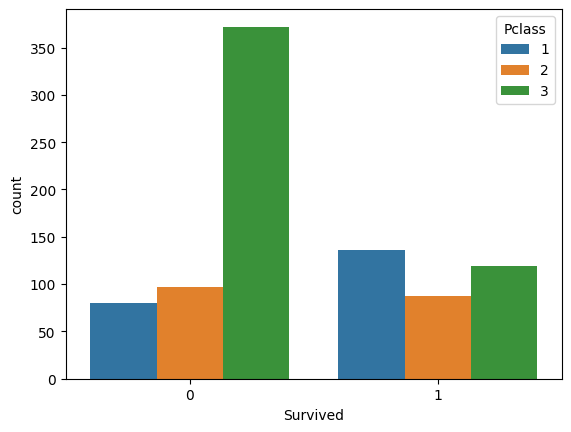

In [16]:
# Number of People Survived by Class 
sns.countplot(data = train_df, x = "Survived", hue = "Pclass")

In [17]:
# This table shows that females have higher survival rates than males
# Within "Pclass", first-class ticket holders have a higher survival rate than second and third-class ticket holders
grouped_mean = train_df.select_dtypes(include = ["number"]).columns
grouped_mean = train_df.groupby(["Sex", "Pclass"])[grouped_mean].mean()
grouped_mean

PassengerId  Survived  Pclass        Age     SibSp     Parch  \
Sex    Pclass                                                                 
female 1        469.212766  0.968085     1.0  34.611765  0.553191  0.457447   
       2        443.105263  0.921053     2.0  28.722973  0.486842  0.605263   
       3        399.729167  0.500000     3.0  21.750000  0.895833  0.798611   
male   1        455.729508  0.368852     1.0  41.281386  0.311475  0.278689   
       2        447.962963  0.157407     2.0  30.740707  0.342593  0.222222   
       3        455.515850  0.135447     3.0  26.507589  0.498559  0.224784   

                     Fare  
Sex    Pclass              
female 1       106.125798  
       2        21.970121  
       3        16.118810  
male   1        67.226127  
       2        19.741782  
       3        12.661633

In [18]:
# This table shows the survival rate for children under the age of 18
# For first and second-class ticket holders, the survival rates are 0.8 and above regardless of gender
# However, the survival rate for third-class ticket holders is much lower
# When viewed from a gender perspective, females have a higher survival rate than their male counterparts
children = train_df.query("Age < 18")
grouped_mean = children.select_dtypes(include = ["number"]).columns
grouped_mean = children.groupby(["Sex", "Pclass"])[grouped_mean].mean()
grouped_mean

PassengerId  Survived  Pclass        Age     SibSp     Parch  \
Sex    Pclass                                                                 
female 1        525.375000  0.875000     1.0  14.125000  0.500000  0.875000   
       2        369.250000  1.000000     2.0   8.333333  0.583333  1.083333   
       3        374.942857  0.542857     3.0   8.428571  1.571429  1.057143   
male   1        526.500000  1.000000     1.0   8.230000  0.500000  2.000000   
       2        527.818182  0.818182     2.0   4.757273  0.727273  1.000000   
       3        437.953488  0.232558     3.0   9.963256  2.069767  1.000000   

                     Fare  
Sex    Pclass              
female 1       104.083337  
       2        26.241667  
       3        18.727977  
male   1       116.072900  
       2        25.659473  
       3        22.752523

Text(0, 0.5, 'Count')

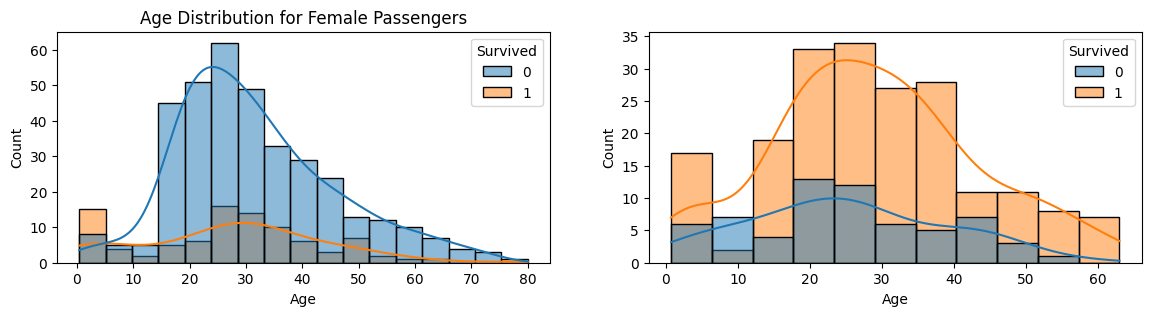

In [19]:
# Creating two histogram
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 3))

# Define "male" and "female" with all missing values in column "Age" dropped
male = train_df.query("Sex == 'male'").dropna(subset = ["Age"])
female = train_df.query("Sex == 'female'").dropna(subset = ["Age"])

# Age Distribution for Male Passengers Survival
sns.histplot(data = male, x = "Age", hue = "Survived", kde = True, ax = ax1)
ax1.set_title("Age Distribution for Male Passengers")
ax1.set_xlabel("Age")
ax1.set_ylabel("Count")

# Age distribution for Female Passengers Survival 
sns.histplot(data = female, x = "Age", hue = "Survived", kde = True, ax = ax2)
ax1.set_title("Age Distribution for Female Passengers")
ax2.set_xlabel("Age")
ax2.set_ylabel("Count")

<Axes: xlabel='Pclass', ylabel='Survived'>

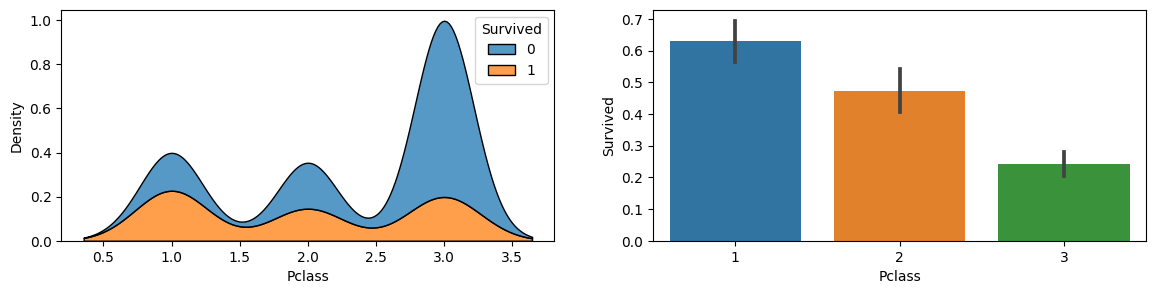

In [20]:
# Creating two graphs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 3))

# This plot shows survival rate distribution by Class
sns.kdeplot(data = train_df, x = "Pclass", hue = "Survived", multiple="stack", ax = ax1)
sns.barplot(data = train_df, x = "Pclass", y = "Survived", ax = ax2)

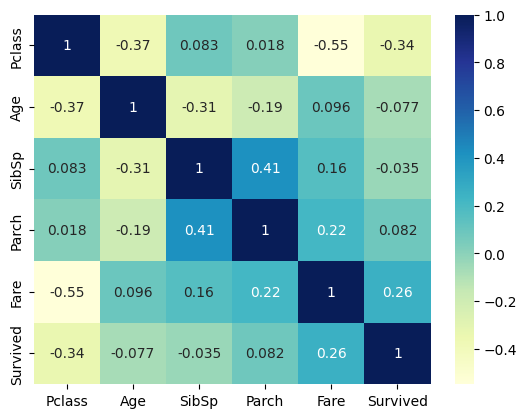

In [21]:
# Correlation matrix between "Pclass", "Age", "SibSp", "Parch","Fare", and "Survived"
sns.heatmap(train_df[["Pclass","Age","SibSp","Parch","Fare","Survived"]].corr(), cmap="YlGnBu", annot=True)
plt.show()

# Feature Engineering
**PassengerId:**
The "PassengerId" column contains 891 unique values in the train dataset and 418 unique values in the test dataset, matching the total number of entries in each dataset. Since it does not provide any meaningful information, it has been dropped.

**Ticket:**
The "Ticket" column has 681 unique values in the train dataset and 363 unique values in the test dataset, making it challenging to transform into a meaningful feature. Therefore, it has been dropped.

**Fare:**
There is one missing value in the test dataset. Dropping it is not advisable since it is crucial for testing. Therefore, use the quantile-based binning method to divide the "Fare" column into six equal-sized categories, categorizing the fare ranges accordingly. This will split the "Fare" column into six intervals based on the quantile binning results.

**Sex:**
The "Sex" column has been converted from strings to integers using mapping: male is mapped to "0" and female to "1".

**SibSp, Parch, Relatives, and Not Alone:**
The "SibSp" column indicates the number of siblings or spouses aboard, while the "Parch" column indicates the number of parents or children aboard. The "Relatives" column is the sum of "SibSp" and "Parch". The "Not Alone" column is derived from "Relatives"; if "Relatives" is greater than 1, "Not Alone" is set to 0, indicating the passenger is not alone. If "Relatives" is 1 or less, "Not Alone" is set to 1, indicating the passenger is alone.

**Cabin and Deck:**
Based on the photo below, the cabin is divided into 7 parts: A, B, C, D, E, F, G. Upper decks are A, B, C; middle decks are D, E; and lower decks are F, G. A new column, "Deck", is created to extract the letter from the "Cabin" column. 

**Age:**
The train and test datasets together contain 263 missing values. Removing the column would lead to a loss of important data. Consequently, the missing values were imputed with random values within the range of the mean minus the standard deviation and the mean plus the standard deviation. Once the missing values were filled, the "Age" column was divided into various age groups.

**Name and Title:**
Individual words are extracted from the "Name" column, and their frequencies are calculated. The four most frequent words ("Mr", "Miss", "Mrs", "Master") are identified as titles. A new "Title" column is created with these words mapped to numerical values, and the original "Name" column is then dropped.






















In [22]:
# Combining two dataframes 
data = [train_df,test_df]

In [23]:
# Training dataset "PassengerID"
train_unique_passenger_id_count = train_df["PassengerId"].nunique()
print(f"Number of unique values in the training dataset column 'PassengerId' is {train_unique_passenger_id_count}")

# Testing dataset "PassengerID"
test_unique_passenger_id_count = test_df["PassengerId"].nunique()
print(f"Number of unique values in the testing dataset column 'PassengerId' is {test_unique_passenger_id_count}")

for dataset in data:
    dataset.drop(["PassengerId"], axis = 1, inplace = True)

print("-"* 100)

print("'PassengerId' column has been succesfully dropped on both train and test datasets")

Number of unique values in the training dataset column 'PassengerId' is 891
Number of unique values in the testing dataset column 'PassengerId' is 418
----------------------------------------------------------------------------------------------------
'PassengerId' column has been succesfully dropped on both train and test datasets


In [24]:
# Training dataset "Ticket"
train_unique_ticket_count = train_df["Ticket"].nunique()
print(f"Number of unique values in the training dataset column 'Ticket' is {train_unique_ticket_count}")

# Testing dataset "Ticket"
test_unique_ticket_count = test_df["Ticket"].nunique()
print(f"Number of unique values in the testing dataset column 'Ticket' is {test_unique_ticket_count}")

for dataset in data:
    dataset.drop(["Ticket"], axis = 1, inplace = True)

print("-"* 100)

print("'Ticket' column has been succesfully dropped on both train and test datasets")

Number of unique values in the training dataset column 'Ticket' is 681
Number of unique values in the testing dataset column 'Ticket' is 363
----------------------------------------------------------------------------------------------------
'Ticket' column has been succesfully dropped on both train and test datasets


In [25]:
# Training dataset "Fare"
train_missing_values_fare_count = train_df["Fare"].isnull().sum()
print(f"Number of missing values in the training dataset column 'Fare' before feature engineering is {train_missing_values_fare_count}")

# Testing dataset "Fare"
test_missing_values_fare_count = test_df["Fare"].isnull().sum()
print(f"Number of missing values in the testing dataset column 'Fare' before feature engineering is {test_missing_values_fare_count}")

for dataset in data:
    dataset["Fare"] = dataset["Fare"].fillna(0)
    dataset["Fare"] = dataset["Fare"].astype(int)


Number of missing values in the training dataset column 'Fare' before feature engineering is 0
Number of missing values in the testing dataset column 'Fare' before feature engineering is 1


In [26]:
# Divide the "Fare" column into 6 equal-sized quantiles to categorize fare ranges
pd.qcut(train_df["Fare"], q = 6) 

0      (-0.001, 7.0]
1      (52.0, 512.0]
2      (-0.001, 7.0]
3      (52.0, 512.0]
4         (7.0, 8.0]
           ...      
886      (8.0, 14.0]
887     (26.0, 52.0]
888     (14.0, 26.0]
889     (26.0, 52.0]
890    (-0.001, 7.0]
Name: Fare, Length: 891, dtype: category
Categories (6, interval[float64, right]): [(-0.001, 7.0] < (7.0, 8.0] < (8.0, 14.0] < (14.0, 26.0] < (26.0, 52.0] < (52.0, 512.0]]

In [27]:
# Categorize "Fare" column into six intervals based on results when categorizing fare ranges using "qcut" method
for dataset in data:
    dataset.loc[ dataset["Fare"] <= 7, "Fare"] = 0
    dataset.loc[(dataset["Fare"] > 7) & (dataset["Fare"] <= 8), "Fare"] = 1
    dataset.loc[(dataset["Fare"] > 8) & (dataset["Fare"] <= 14), "Fare"]   = 2
    dataset.loc[(dataset["Fare"] > 14) & (dataset["Fare"] <= 26), "Fare"]   = 3
    dataset.loc[(dataset["Fare"] > 26) & (dataset["Fare"] <= 52), "Fare"]   = 4
    dataset.loc[dataset["Fare"] > 52, "Fare"] = 5
    dataset["Fare"] = dataset["Fare"].astype(int)

In [28]:
# Training dataset "Fare"
train_missing_values_fare_count = train_df["Fare"].isnull().sum()
print(f"Number of missing values in the training dataset column 'Fare' after feature engineering is {train_missing_values_fare_count}")

# Testing dataset "Fare"
test_missing_values_fare_count = test_df["Fare"].isnull().sum()
print(f"Number of missing values in the testing dataset column 'Fare' after feature engineering is {test_missing_values_fare_count}")

Number of missing values in the training dataset column 'Fare' after feature engineering is 0
Number of missing values in the testing dataset column 'Fare' after feature engineering is 0


In [29]:
# Dictionary to map "mapping_sex_column" letters to numerical values
mapping_sex_column = {"male": 0,"female": 1}

# Map "Sex" column from the dictionary "mapping_sex_column"
for dataset in data:
  dataset["Sex"] = dataset["Sex"].map(mapping_sex_column)

print("Mapping in the 'Sex' column has been successfully completed: 0 for male and 1 for female.")

Mapping in the 'Sex' column has been successfully completed: 0 for male and 1 for female.


<Axes: xlabel='Relatives', ylabel='Survived'>

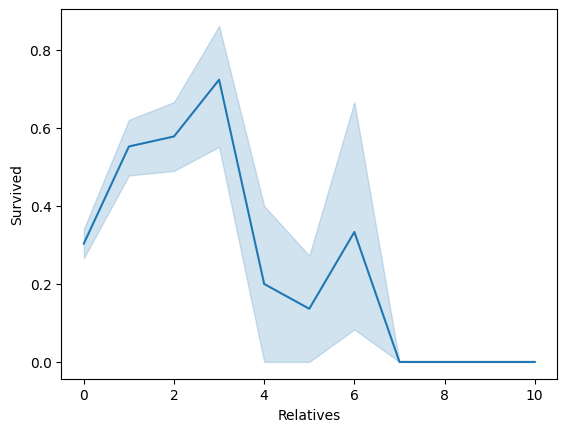

In [30]:
# "SibSp" represents the number of siblings/spouses aboard, and "Parch" represents the number of parents/children aboard.
# Combining these two columns to create a new column called "Relatives" to indicate if the passenger has relatives on board the Titanic.
for dataset in data:
    dataset["Relatives"] = dataset["SibSp"] + dataset["Parch"]
    
# This function will be used for the "Not Alone" column 
def not_alone(relative):
    if relative > 0:
        return 0   # Passenger has relatives
    else:
        return 1   # Passenger has no relatives

# Applying function "Not Alone"    
for dataset in data:
    dataset["Not Alone"] = dataset["Relatives"].apply(not_alone)
    
# Plotting graph
sns.lineplot(data = train_df, x = "Relatives", y = "Survived")

In [31]:
# Import the Image and display functions from IPython.display
from IPython.display import Image, display

# Displaying the image
display(Image(url="https://upload.wikimedia.org/wikipedia/commons/0/0d/Olympic_%26_Titanic_cutaway_diagram.png"))

In [32]:
# The image above displays certain decks that are to specific classes
# Upper decks (A, B, C) | Middle decks (D, E) | Lower decks (F, G)

# Dictionary to map "mapping_deck_column" letters to numerical values
mapping_deck_column = {"A": 1,"B": 2,"C": 3,"D": 4,"E": 5,"F": 6,"G": 7,"U": 8}

# The "Deck" column is extracted from the "Cabin" column. For instance, if the "Cabin" is D45, the corresponding "Deck" would be D
for dataset in data:
  dataset["Cabin"] = dataset["Cabin"].fillna("U0")  # Fill missing values with "U0"
  dataset["Deck"] = dataset["Cabin"].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())  # Extracting letter
  dataset["Deck"] = dataset["Deck"].map(mapping_deck_column) # Map "Deck" column from the dictionary "mapping_deck_column"
  dataset["Deck"] = dataset["Deck"].fillna(0)  # Fill missing values with "0"
  dataset["Deck"] = dataset["Deck"].astype(int)  # Convert column "Deck" to integer
  dataset.drop(["Cabin"], axis = 1, inplace = True)  # Dropping the "Cabin" column

print("The 'Deck' column has been successfully created by extracting the letter from the 'Cabin' column.")

The 'Deck' column has been successfully created by extracting the letter from the 'Cabin' column.


In [33]:
# Training dataset "Age"
train_missing_values_age_count = train_df["Age"].isnull().sum()
print(f"Number of missing values in the training dataset column 'Age' before feature engineering is {train_missing_values_age_count}")

# Testing dataset "Age"
test_missing_values_age_count = test_df["Age"].isnull().sum()
print(f"Number of missing values in the testing dataset column 'Age' before feature engineering is {test_missing_values_age_count}")

# Filling up missing values in "Age" column between lower bound (mean - std) and upper bound (mean + std)
for dataset in data:
    mean = train_df["Age"].mean()  # Calculate the mean
    std = train_df["Age"].std()  # Calculate the standard deviation
    is_null = dataset["Age"].isnull().sum()  # Calculating the total number of missing values between "train_df" and "test_df"

    # Compute random numbers between the mean and std, and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
 
    # Fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice.astype(int)  # Convert to integers

print("-"* 100)

# Training dataset "Age"
train_missing_values_age_count = train_df["Age"].isnull().sum()
print(f"Number of missing values in the training dataset column 'Age' after feature engineering is {train_missing_values_age_count}")

# Testing dataset "Age"
test_missing_values_age_count = test_df["Age"].isnull().sum()
print(f"Number of missing values in the testing dataset column 'Age' after feature engineering is {test_missing_values_age_count}")

Number of missing values in the training dataset column 'Age' before feature engineering is 177
Number of missing values in the testing dataset column 'Age' before feature engineering is 86
----------------------------------------------------------------------------------------------------
Number of missing values in the training dataset column 'Age' after feature engineering is 0
Number of missing values in the testing dataset column 'Age' after feature engineering is 0


In [34]:
# This block of code categorizes the 'Age' column into different age groups.
for dataset in data:
    dataset["Age"] = dataset["Age"].astype(int)
    dataset.loc[dataset["Age"] <= 11, "Age"] = 0
    dataset.loc[(dataset["Age"] > 11) & (dataset["Age"] <= 18), "Age"] = 1
    dataset.loc[(dataset["Age"] > 18) & (dataset["Age"] <= 22), "Age"] = 2
    dataset.loc[(dataset["Age"] > 22) & (dataset["Age"] <= 27), "Age"] = 3
    dataset.loc[(dataset["Age"] > 27) & (dataset["Age"] <= 33), "Age"] = 4
    dataset.loc[(dataset["Age"] > 33) & (dataset["Age"] <= 40), "Age"] = 5
    dataset.loc[(dataset["Age"] > 40) & (dataset["Age"] <= 66), "Age"] = 6
    dataset.loc[dataset["Age"] > 66, "Age"] = 7


In [35]:
# Checking the distribution
train_df['Age'].value_counts()

Age
6    158
4    156
5    152
3    142
2    111
1     97
0     68
7      7
Name: count, dtype: int64

In [36]:
# Training dataset "Embarked"
train_missing_values_embarked_count = train_df["Embarked"].isnull().sum()
print(f"Number of missing values in the training dataset column 'Embarked' is {train_missing_values_embarked_count}")

# Testing dataset "Embarked"
test_missing_values_embarked_count = test_df["Embarked"].isnull().sum()
print(f"Number of missing values in the testing dataset column 'Embarked' is {test_missing_values_embarked_count}")

# Most frequent value in "Embarked"
train_embarked_count = train_df["Embarked"].mode()[0]
print(f"Most frequent value repeated in column 'Embarked' is {train_embarked_count}")

# Filling missing values with the most frequent value in column "Embarked"
for dataset in data:
    dataset["Embarked"] = dataset["Embarked"].fillna("S")

# Dictionary to map "Embarked" letters to numerical values
mapping_embarked_column = {"S": 0, "C": 1, "Q": 2}

# Map "Embarked" column from the dictionary "mapping_embarked_column"
for dataset in data:
  dataset["Embarked"] = dataset["Embarked"].map(mapping_embarked_column)

print("-"* 100)

# Count the occurrences of each unique value in the "Embarked" column for training dataset
# "S" is 0, "C" is 1, and "Q" is 2
train_df["Embarked"].value_counts()

Number of missing values in the training dataset column 'Embarked' is 2
Number of missing values in the testing dataset column 'Embarked' is 0
Most frequent value repeated in column 'Embarked' is S
----------------------------------------------------------------------------------------------------


Embarked
0    646
1    168
2     77
Name: count, dtype: int64

In [37]:
# Function "data_cleaning"
def data_cleaning(text):
    # Remove all special characters
    text = re.sub("[^\w\s]", " ", text)
    # Convert all text to lower case
    text = text.lower()
    # Condense multiple spaces into one
    text = re.sub("\s+", " ", text)
    return text

# Apply "data_cleaning" function to dataset
for dataset in data:
    dataset["clean_name"] = dataset["Name"].apply(data_cleaning)

In [38]:
# Define column "clean_name" from training dataset as "name"
name = train_df["clean_name"]

# Join the elements of the Series into a single string
name = ' '.join(name)

# Breaking strings into indivisual words
token = word_tokenize(name)

# Creating unigrams from a list of tokens (indivisual words)
name_unigram = list(ngrams(token, 1))

# Calculating the frequency distribution of unigrams
name_unigram_freq = nltk.FreqDist(name_unigram)

# Converting frequency distrubiton of unigrams into dictionary
name_unigram_freq_dict = dict(name_unigram_freq)

In [39]:
# Converting unigrams dictionary into a dataframe with indivisual words and count per word
name_unigram_freq_df = pd.DataFrame({"words": name_unigram_freq_dict.keys() ,"count":  name_unigram_freq_dict.values()})

# Sorting the DataFrame by word count in descending order
name_unigram_freq_df = name_unigram_freq_df.sort_values(by = "count", ascending = False)

# Removing special characters from column "words"
name_unigram_freq_df["words"] = name_unigram_freq_df["words"].astype(str).str.replace(r"[^\w\s]", "", regex=True)

In [40]:
# List of male and female names in lowercase
all_names = set(name.lower() for name in names.words())

# Function to remove English names
def remove_names(text):
    if not isinstance(text, str):
        return text
    words = text.split()
    cleaned_words = [word for word in words if word.lower() not in [name.lower() for name in all_names]]
    return ' '.join(cleaned_words)

# Apply "remove_names" function to "name_unigram_freq_df"
name_unigram_freq_df["words"] = name_unigram_freq_df["words"].apply(remove_names)

# Removing all rows that contain blank entries not recognized as missing values
name_unigram_freq_df = name_unigram_freq_df[(name_unigram_freq_df != "").all(axis=1)]
name_unigram_freq_df

,words,count
1,mr,521
12,miss,182
5,mrs,129
29,master,40
205,jr,10
...,...,...
685,moraweck,1
684,sternin,1
681,helmina,1
680,nilsson,1


In [41]:
# Top 4 words to be used as "Titles"
titles = ["Mr","Miss","Mrs","Master"]
titles_mapping_column = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}

# Function to extract the title
def extract_title(name):
    for t in titles:
        if t in name:
            return t
    return "Other"

for dataset in data:
  dataset["Title"] = dataset["Name"].apply(extract_title)
  dataset["Title"] = dataset["Title"].map(titles_mapping_column)
  dataset.drop(["Name"], axis = 1, inplace = True)

# Define "Features" and "Target"
In this section, I specified the "Features" and "Target" for X_train, y_train, X_test, and y_test.


In [42]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Survived    891 non-null    int64 
 1   Pclass      891 non-null    int64 
 2   Sex         891 non-null    int64 
 3   Age         891 non-null    int64 
 4   SibSp       891 non-null    int64 
 5   Parch       891 non-null    int64 
 6   Fare        891 non-null    int64 
 7   Embarked    891 non-null    int64 
 8   Relatives   891 non-null    int64 
 9   Not Alone   891 non-null    int64 
 10  Deck        891 non-null    int64 
 11  clean_name  891 non-null    object
 12  Title       891 non-null    int64 
dtypes: int64(12), object(1)
memory usage: 90.6+ KB


In [43]:
# Define "train_X"
train_df = train_df.select_dtypes(exclude=["object"])
train_X = train_df.iloc[:,1:]

In [44]:
train_X.sample()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives,Not Alone,Deck,Title
90,3,0,4,0,0,1,0,0,1,8,1


In [45]:
# Define "train_y"
train_y = train_df.iloc[:,0]

In [46]:
train_y.sample()

326    0
Name: Survived, dtype: int64

In [47]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Survived    418 non-null    int64 
 1   Pclass      418 non-null    int64 
 2   Sex         418 non-null    int64 
 3   Age         418 non-null    int64 
 4   SibSp       418 non-null    int64 
 5   Parch       418 non-null    int64 
 6   Fare        418 non-null    int64 
 7   Embarked    418 non-null    int64 
 8   Relatives   418 non-null    int64 
 9   Not Alone   418 non-null    int64 
 10  Deck        418 non-null    int64 
 11  clean_name  418 non-null    object
 12  Title       418 non-null    int64 
dtypes: int64(12), object(1)
memory usage: 42.6+ KB


In [48]:
# Define "test_X"
test_df = test_df.select_dtypes(exclude=["object"])
test_X = test_df.iloc[:,1:]

In [49]:
test_X.sample()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives,Not Alone,Deck,Title
226,3,0,3,0,0,0,0,0,1,8,1


In [50]:
# Define "test_y"
test_y = test_df.iloc[:,0]

In [51]:
test_y.sample()

162    1
Name: Survived, dtype: int64

# Model Building
The lazy predict library is used to evaluate various models' performance using default settings, measuring metrics such as accuracy, balanced accuracy, ROC AUC, and F1 score. In this evaluation, the **RidgeClassifierCV ** emerged as the best-performing model.

In [52]:
# Install Lazy Predict
!pip install lazypredict

In [53]:
# Import the Lazy Classifier
from lazypredict.Supervised import LazyClassifier

# Initialize LazyClassifier to automatically train multiple classification models and compare their performance
classifier = LazyClassifier(random_state = 42)

# Fit the classifier on the training data and make predictions on the test data
models, predictions = classifier.fit(train_X, test_X, train_y, test_y)

# Display the performance of each model
models

100%|██████████| 29/29 [00:02<00:00, 11.39it/s]

[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002064 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 70
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearDiscriminantAnalysis,0.98,0.98,0.98,0.98,0.11
RidgeClassifierCV,0.98,0.98,0.98,0.98,0.11
RidgeClassifier,0.98,0.98,0.98,0.98,0.08
CalibratedClassifierCV,0.97,0.97,0.97,0.97,0.27
LinearSVC,0.97,0.97,0.97,0.97,0.12
NuSVC,0.95,0.95,0.95,0.95,0.08
LogisticRegression,0.95,0.95,0.95,0.95,0.08
SVC,0.94,0.94,0.94,0.94,0.05
QuadraticDiscriminantAnalysis,0.91,0.93,0.93,0.92,0.03


# RidgeClassifierCV

In [54]:
# Import RidgeClassifierCV
from sklearn.linear_model import RidgeClassifierCV

# Define RidgeClassifierCV 
model = RidgeClassifierCV()

# Fit the Model to the training data
model.fit(train_X, train_y)

# Make predictions on the test data
y_predict = model.predict(test_X)

# Import the metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, matthews_corrcoef

# Calculate 
accuracy = accuracy_score(test_y, y_predict)
precision = precision_score(test_y, y_predict)
recall = recall_score(test_y, y_predict)
f1 = f1_score(test_y, y_predict)
mcc = matthews_corrcoef(test_y, y_predict)
conf_matrix = confusion_matrix(test_y, y_predict)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Matthews Correlation Coefficient (MCC):", mcc)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9784688995215312
Precision: 0.9673202614379085
Recall: 0.9736842105263158
F1 Score: 0.9704918032786886
Matthews Correlation Coefficient (MCC): 0.9535556414979796
Confusion Matrix:
 [[261   5]
 [  4 148]]


Text(0, 0.5, 'True Label')

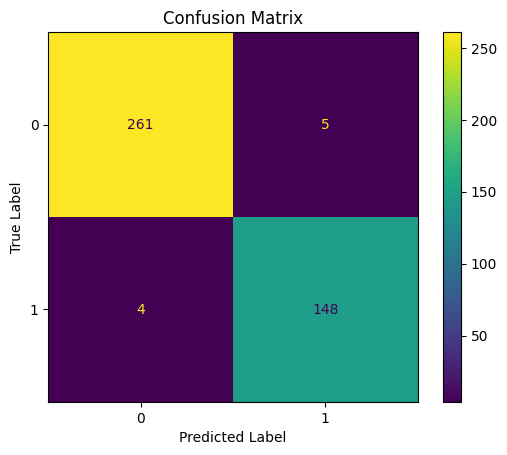

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate the confusion matrix for the test set predictions
cm = confusion_matrix(test_y, y_predict)

# Get the class labels from the model
labels = model.classes_

# Create a ConfusionMatrixDisplay object with the calculated confusion matrix and class labels
matrix = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)

# Plot the confusion matrix
matrix.plot()
matrix.ax_.set_title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Submission

In [56]:
# Import gender submission file
gender_submission = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

In [57]:
submission = pd.DataFrame()

PassengerId = gender_submission["PassengerId"]
submission["PassengerId"] = PassengerId
submission['Survived'] = y_predict

submission.head()
submission.to_csv("Submission.csv", index=False)

# 